# dataset is taken from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [5]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib  # Import joblib separately
import tensorflow as tf

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
 ProfileReport(data, minimal=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Preprocess the data
X = data.drop('target', axis=1)
y = data['target']


In [5]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision * 100:.2f}%")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall * 100:.2f}%")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1 * 100:.2f}%")

Accuracy: 98.54%
Precision: 100.00%
Recall: 97.09%
F1-score: 98.52%


### decision tree

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

# Load the dataset from the CSV file
data = pd.read_csv('heart.csv')


In [10]:
# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9707792207792207


In [12]:
import pandas as pd

# Feature names based on the order of your original dataset columns
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Sample input data for prediction with feature names
sample_input = pd.DataFrame([[52, 1, 0, 110, 222, 0, 1, 166, 0, 1.0, 2, 2, 3]], columns=feature_names)

# Predict using the trained decision tree classifier
prediction = clf.predict(sample_input)

# The 'prediction' variable now holds the predicted result (0 or 1) for heart disease.
print("Predicted result for the sample input:", prediction[0])



Predicted result for the sample input: 0


In [13]:
# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the same training data
model.fit(X_train, y_train, epochs=50, batch_size=32)



# Save the model in the TensorFlow SavedModel format
model.save('heart_disease_model')


Epoch 1/50
23/23 [==============================] - 1s 3ms/step - loss: 3.2389 - accuracy: 0.6081
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1.2497 - accuracy: 0.6681
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.6876
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.7015
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6834
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.6402
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.7001
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7294
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7364
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7866
Epoch 11/50
23/23 [

INFO:tensorflow:Assets written to: heart_disease_model\assets


In [14]:
accuracy_sklearn = clf.score(X_test, y_test)
model = tf.keras.models.load_model('heart_disease_model')
accuracy_tf = model.evaluate(X_test, y_test, verbose=0)[1]
print("Accuracy with scikit-learn Decision Tree Model:", accuracy_sklearn)
print("Accuracy with TensorFlow Model:", accuracy_tf)



Accuracy with scikit-learn Decision Tree Model: 0.9707792207792207
Accuracy with TensorFlow Model: 0.7694805264472961


In [15]:
converter = tf.lite.TFLiteConverter.from_saved_model('heart_disease_model')
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('heart_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)



In [16]:
# Sample input data for prediction
sample_input = [[52, 1, 0, 150, 222, 0, 1, 166, 0, 1.0, 2, 2, 3]]

# Predict using the trained neural network model
prediction = model.predict(sample_input)

# The 'prediction' variable now holds the predicted result (a probability between 0 and 1) for heart disease.
print("Predicted probability for heart disease:", prediction[0][0])


1/1 [==============================] - 0s 163ms/step
Predicted probability for heart disease: 0.5119998


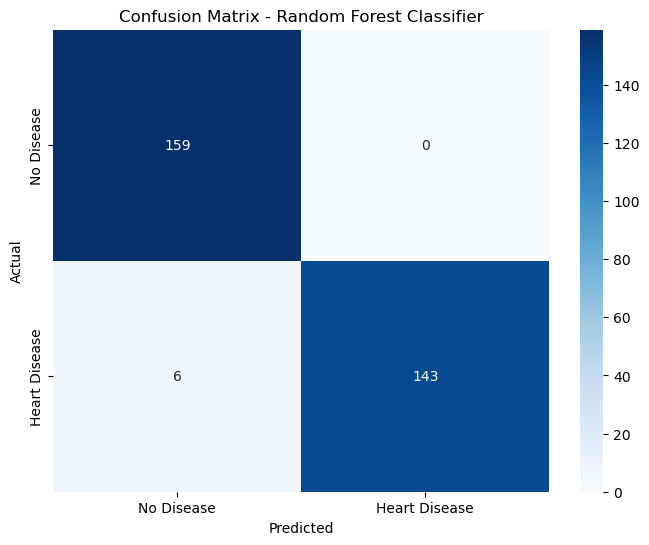

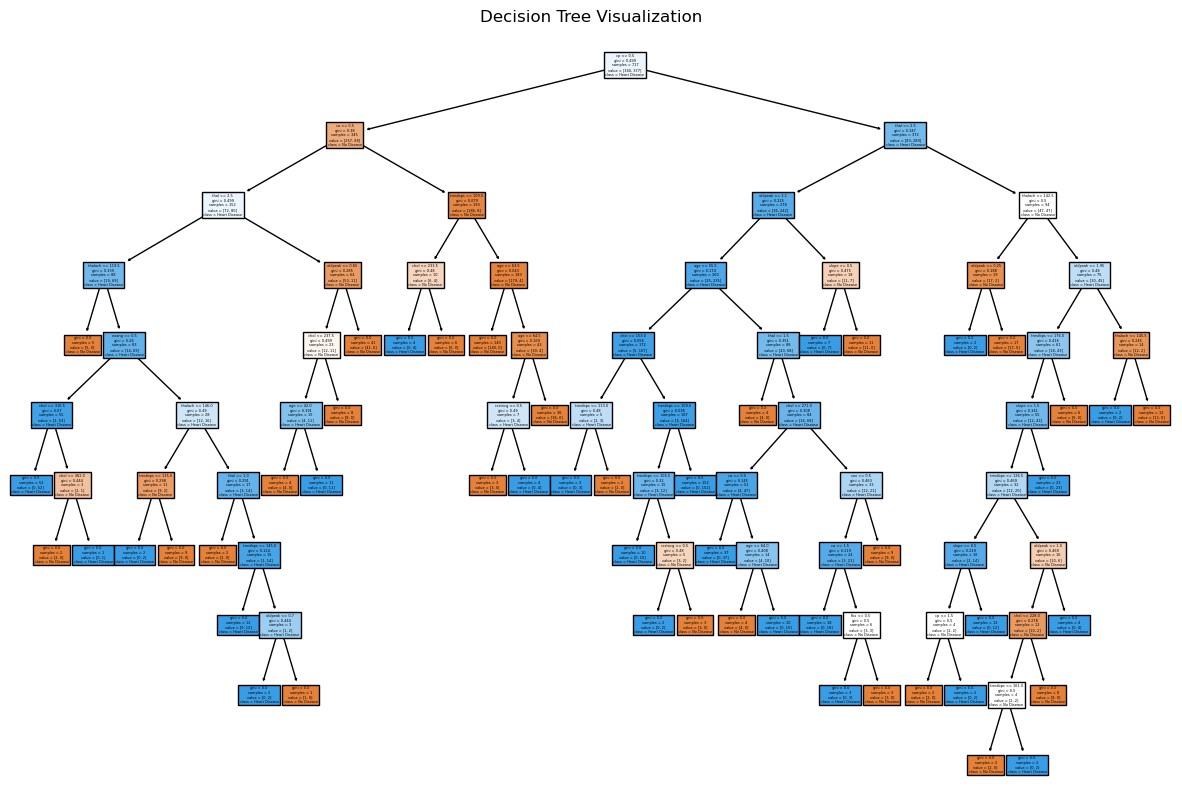

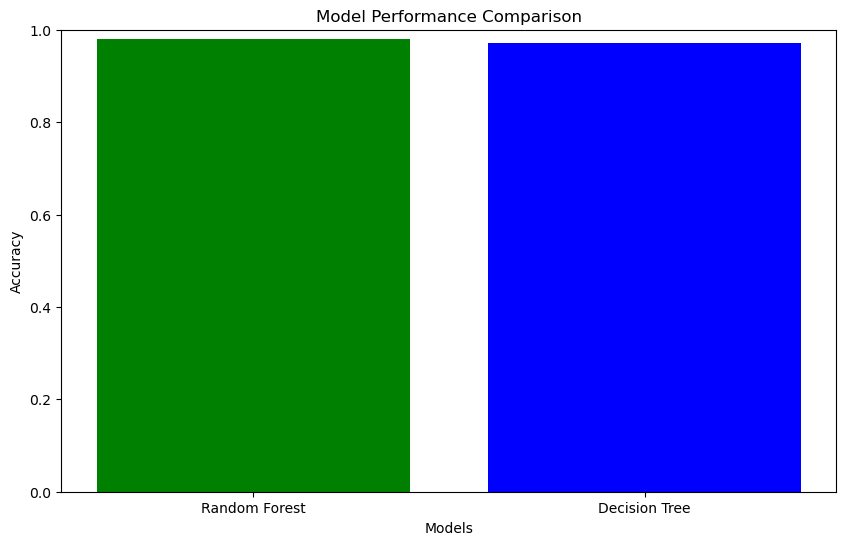

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Evaluate the Decision Tree model
accuracy_dt = clf.score(X_test, y_test)

# Visualize confusion matrix for Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Visualize decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No Disease', 'Heart Disease'])
plt.title('Decision Tree Visualization')
plt.show()

# Visualize model performance comparison
models = ['Random Forest', 'Decision Tree']
accuracies = [accuracy_rf, accuracy_dt]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['green', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentage
plt.show()


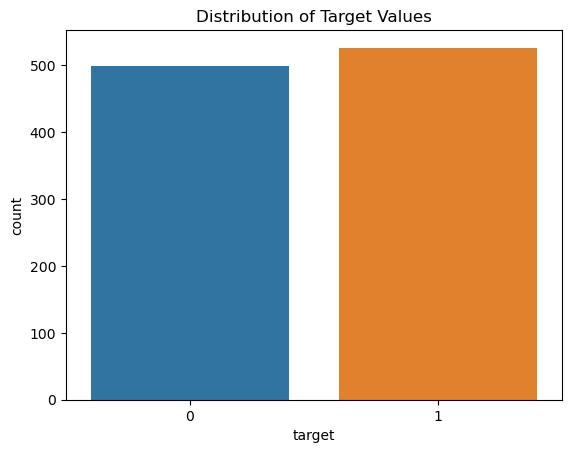

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=data)
plt.title('Distribution of Target Values')
plt.show()


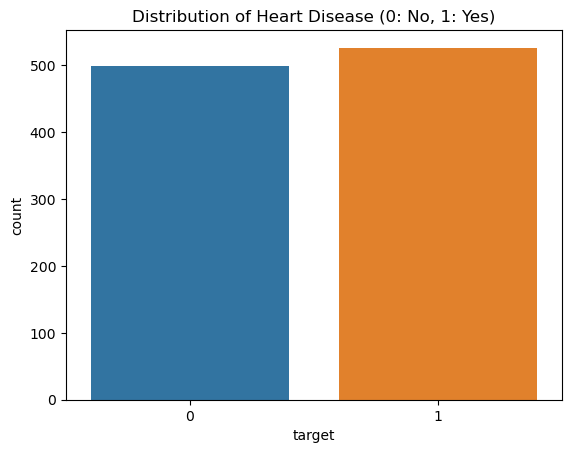

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease (0: No, 1: Yes)')
plt.show()


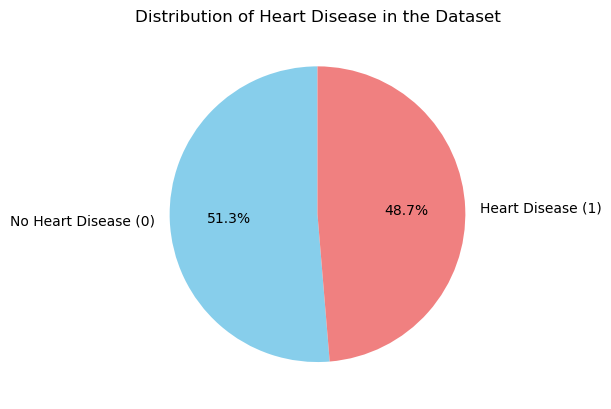

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = data['target'].value_counts()

# Plot a pie chart
plt.pie(target_counts, labels=['No Heart Disease (0)', 'Heart Disease (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease in the Dataset')
plt.show()


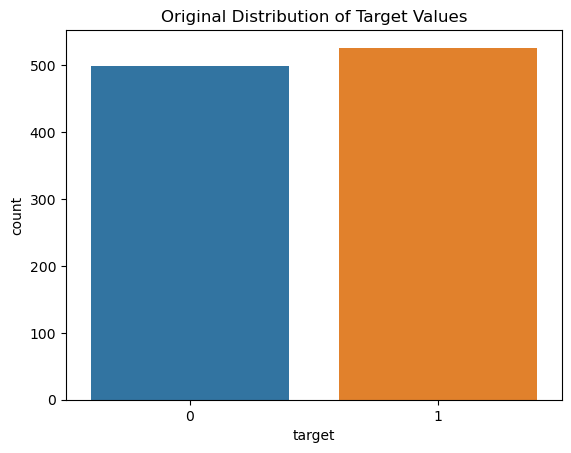

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for target values before preprocessing
sns.countplot(x='target', data=data)
plt.title('Original Distribution of Target Values')
plt.show()


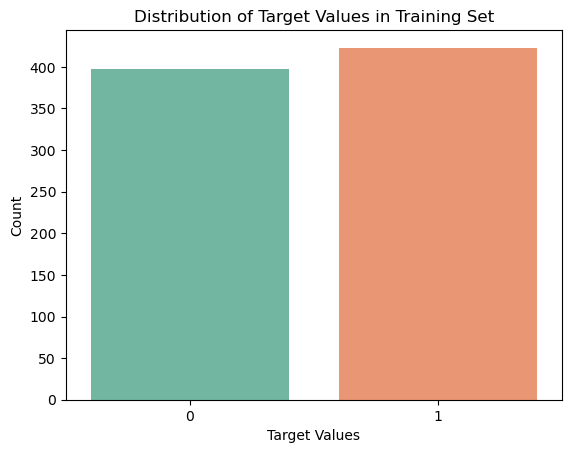

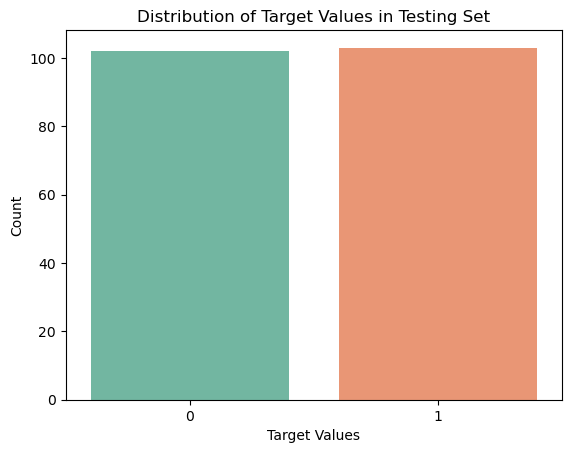

In [90]:
# Count plot for target values in the training set
sns.countplot(x=y_train, palette='Set2')
plt.title('Distribution of Target Values in Training Set')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.show()

# Count plot for target values in the testing set
sns.countplot(x=y_test, palette='Set2')
plt.title('Distribution of Target Values in Testing Set')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.show()
